torch.Size([321, 481, 3])
torch.Size([321, 481, 3])


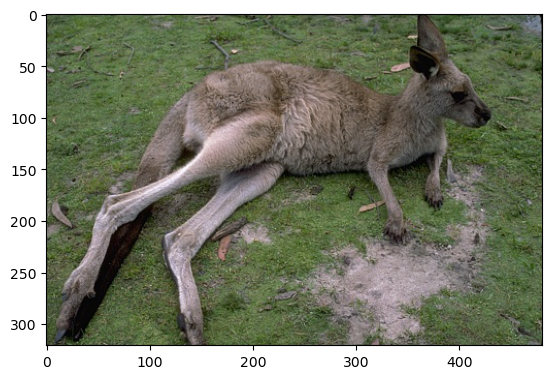

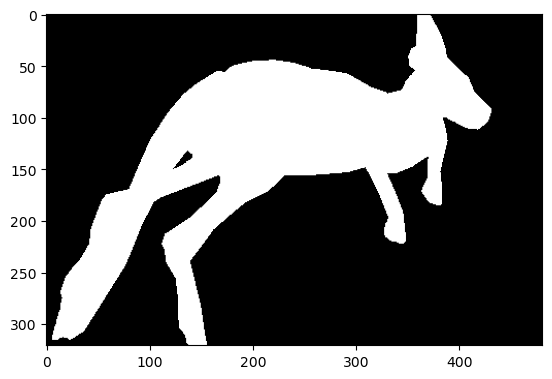

torch.Size([321, 481, 3])
torch.Size([321, 481, 3])


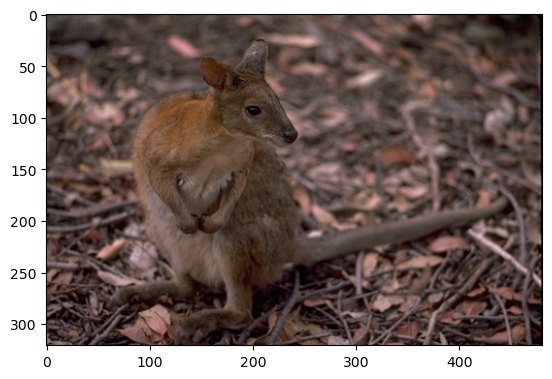

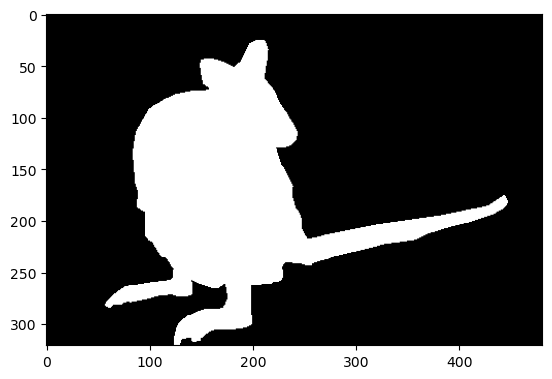

torch.Size([321, 481, 3])
torch.Size([321, 481, 3])


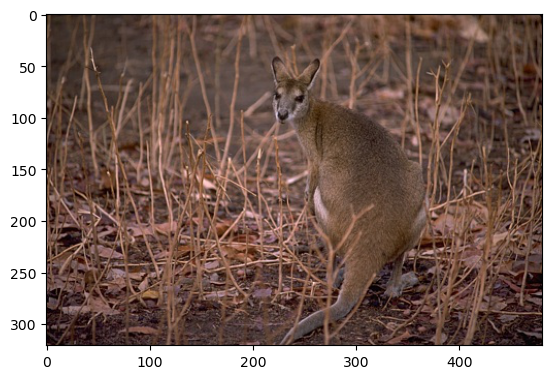

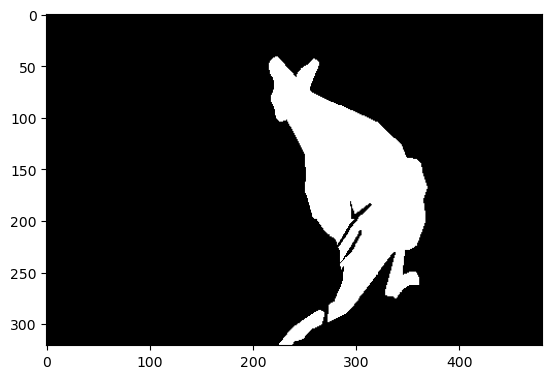

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import torch.utils.data as data


import sys
sys.path.append("..")
import transformations as trns
import datasets as datasets

# do not use transorms.ToTensor(),already implemented implicitly. 

transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomAffine(
            degrees=15,
            translate=(0.05, 0.05),
            scale=(0.95, 1.05),
        ),
        transforms.ColorJitter(
            brightness=0.15,
            contrast=0.15,
            saturation=0.15,
            hue=0.05
        ),
        transforms.RandomVerticalFlip(),
        transforms.RandomHorizontalFlip(),
    ]
)



# Create SegmentationDatasetLabeled
L = datasets.SegmentationDatasetLabeled(
    dir_images="./my_dataset/images/",
    dir_masks="./my_dataset/masks/",
    #transform=transforms.ToTensor()
)

# Create DataLoader for SegmentationDatasetLabeled
batch_size = 2  # set your desired batch size
labeled_dataloader = data.DataLoader(
    L,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1  # set the number of worker processes for loading data
)

# Create SegmentationDatasetUnlabeled
U = datasets.SegmentationDatasetUnlabeled(
    dir_images="./my_dataset/images/",
    #transform=transforms.ToTensor()
)

# Create DataLoader for SegmentationDatasetUnlabeled
unlabeled_dataloader = data.DataLoader(
    U,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1  # set the number of worker processes for loading data
)


for i in range(len(L)):
    img_, mask_ = L[i]
    img_ = img_.permute(1, 2, 0)
    mask_ = mask_.permute(1, 2, 0)
    print(img_.size())
    print(mask_.size())
    plt.imshow(img_)
    plt.figure()
    plt.imshow(mask_)
    plt.show()